### Keras : 딥러닝 모델을 파이썬으로 쉽게 구축할 수 있도록 지원하는 패키지(라이브러리)로 상위레벨 인터페이스 도구

In [25]:
import keras
from keras import layers


In [32]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_35 (Conv2D)             (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_36 (Conv2D)             (None, 28, 28, 64)   18496       ['conv2d_35[0][0]']              
                                                                                                  
 max_pooling2d_11 (MaxPooling2D  (None, 9, 9, 64)    0           ['conv2d_36[0][0]']              
 )                                                                                       

### 파라미터 계산 : 입력크기 * 출력크기 * (필터크기) + 편향(출력크기)
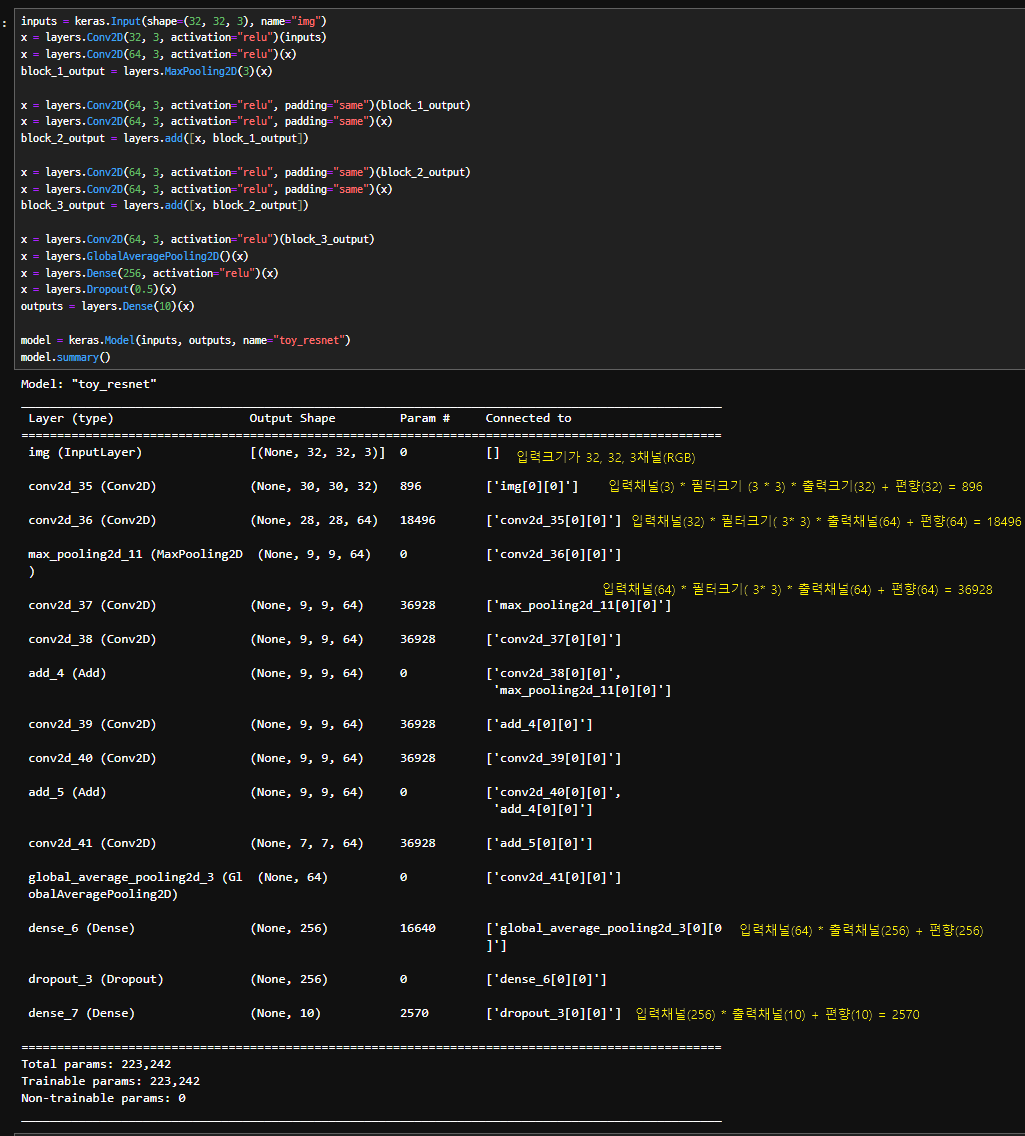

In [34]:
from keras import layers, models


In [41]:
tmodel = models.Sequential()
tmodel.add(layers.Conv2D(32, 5,strides=2, activation = 'relu',input_shape = (34,34,1)))
tmodel.add(layers.Conv2D(64,3, activation='relu'))
tmodel.add(layers.MaxPooling2D(3))
tmodel.add(layers.Dense(256, activation='relu'))
tmodel.add(layers.Dropout(0.5))
tmodel.add(layers.Dense(2))
tmodel.summary()
           

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 15, 15, 32)        832       
                                                                 
 conv2d_49 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 dense_12 (Dense)            (None, 4, 4, 256)         16640     
                                                                 
 dropout_6 (Dropout)         (None, 4, 4, 256)         0         
                                                                 
 dense_13 (Dense)            (None, 4, 4, 2)           514       
                                                      

In [43]:
from keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              